## A*

Là giải thuật tìm kiếm trong đồ thị, tìm kiếm đường đi từ một đỉnh đích có sử dụng hàm để ước lượng khoảng cách hay còn gọi là Heuristic (Giải quyết vấn đề dự trên phỏng đoán, ước chừng, kinh nghiệm, trực giác để tìm ra giải pháp gần như tốt nhất và nhanh chóng)  
* A* sẽ luôn tìm được được đi ngăn nhất nếu tồn tại đường đi như thế. 
* Thứ tự ưu tiên được quyết định bởi hàm Heuristic f(x) = g(n) + h(n).  
  
Thuật giải A*   
* Open: tập các trạng thái đã được sinh ra nhưng chưa được xét đến.   
* Close: tập các trạng thái đã được xét đến.  
* Cost(p, n): là khoảng cách giữa p, n.   
* g(n): khoảng cách từ trạng thái đầu đến trạng thái hiện tại p.  
* h(n): giá trị được lượng giá từ trạng thái hiện tại đến trạng thái đích.    
* f(n) = g(n) + h(n)

In [53]:
import heapq
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

Vì thuật toán A* chú trọng nhất vào hàm Heuristic nên ta sẽ cần xây dựng hàm tính khoảng cách cho nó

Xây dựng hàm tính khoảng cách Manhattan

In [54]:
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

Giải thuật A*

![Screenshot 2024-12-10 161621.png](<attachment:Screenshot 2024-12-10 161621.png>)
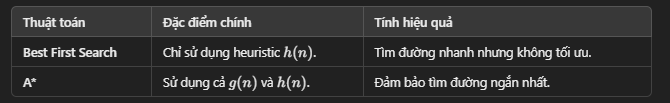

In [55]:
def a_star_search(grid, start, goal):
    # Kích thước ma trận
    rows, cols = len(grid), len(grid[0])
    
    # Hàng đợi ưu tiên (ưu tiên các ô có giá trị f nhỏ nhất)
    priority_queue = []
    heapq.heappush(priority_queue, (0, 0, start))  # (f, g, (x, y))
    
    # Đánh dấu ô đã thăm
    visited = set()
    visited.add(start)
    
    # Đường đi
    came_from = {}
    
    # Chi phí g (từ start đến mỗi ô)
    g_cost = {start: 0}
    
    # Hướng di chuyển (trái, phải, lên, xuống)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while priority_queue:
        # Lấy ô có f nhỏ nhất
        _, g, current = heapq.heappop(priority_queue)
        
        # Nếu đến đích, tái tạo đường đi
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Đảo ngược đường đi
        
        # Duyệt các ô lân cận
        x, y = current
        for dx, dy in directions:  # Duyệt các hướng di chuyển
            nx, ny = x + dx, y + dy
            
            # Kiểm tra nếu ô hợp lệ
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 0:
                neighbor = (nx, ny)
                tentative_g = g + 1  # Chi phí từ start đến neighbor
                
                # Cập nhật thông tin nếu tìm thấy đường đi tốt hơn
                if neighbor not in visited or tentative_g < g_cost.get(neighbor, float('inf')):
                    # Cập nhật thông tin
                    visited.add(neighbor)
                    came_from[neighbor] = current
                    g_cost[neighbor] = tentative_g
                    h = manhattan_distance(nx, ny, goal[0], goal[1])
                    f = tentative_g + h
                    heapq.heappush(priority_queue, (f, tentative_g, neighbor))
    
    # Không tìm được đường đi
    return "No Path Found"

Giải thuật Best First Search

In [56]:
def best_first_search(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    
    priority_queue = []
    heapq.heappush(priority_queue, (0, start))  # (heuristic, (x, y))
    
    visited = set()
    visited.add(start)
    
    came_from = {}
    
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while priority_queue:
        _, current = heapq.heappop(priority_queue)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        
        x, y = current
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited and grid[nx][ny] == 0:
                visited.add((nx, ny))
                came_from[(nx, ny)] = (x, y)
                h = manhattan_distance(nx, ny, goal[0], goal[1])
                heapq.heappush(priority_queue, (h, (nx, ny)))
    
    return "No Path Found"

In [57]:
def bfs_shortest_path(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    
    queue = deque([start])
    
    visited = set()
    visited.add(start)
    
    came_from = {}
    
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while queue:
        current = queue.popleft()
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        
        x, y = current
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited and grid[nx][ny] == 0:
                visited.add((nx, ny))
                came_from[(nx, ny)] = current
                queue.append((nx, ny))
    
    return "No Path Found"

In [58]:
# Tạo ma trận
def generate_grid(rows, cols, num_obstacles):
    grid = np.zeros((rows, cols))
    obstacles = 0
    while obstacles < num_obstacles:
        x, y = np.random.randint(0, rows), np.random.randint(0, cols)
        if grid[x, y] == 0:
            grid[x, y] = 1
            obstacles += 1
    return grid


In [59]:
# Vẽ ma trận với đường đi và tô màu đỏ cho ô đích
def visualize_path(grid, path, title, goal=None):
    grid_copy = [row[:] for row in grid]  # Tạo bản sao của grid
    for x, y in path:
        grid_copy[x][y] = 0.5  # Đánh dấu đường đi
    
    # Tô màu đỏ cho ô đích (nếu có)
    if goal:
        gx, gy = goal
        grid_copy[gx][gy] = 1  # Tô đỏ cho ô đích, bạn có thể thay đổi giá trị này tùy ý
    
    plt.imshow(grid_copy, cmap='binary')
    plt.title(title)
    plt.colorbar()
    plt.show()

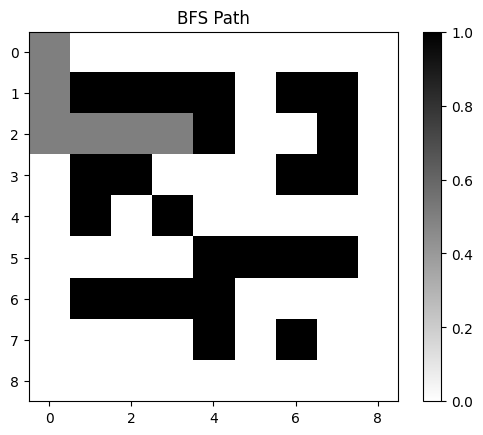

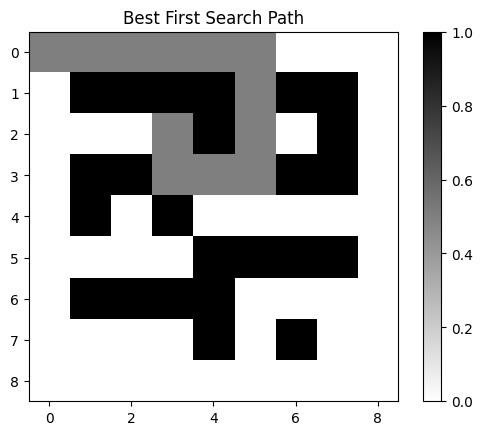

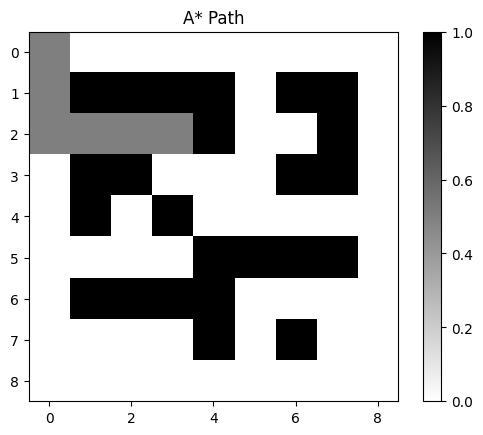

In [60]:
# Khởi tạo ma trận, điểm bắt đầu và đích
# grid = generate_grid(9, 9, 15)  
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]
start = (0,0)
goal  = (2,3)

# Chạy các thuật toán
bfs_path = bfs_shortest_path(grid, start, goal)
best_first_path = best_first_search(grid, start, goal)
a_star_path = a_star_search(grid, start, goal)

# Trực quan hóa kết quả
visualize_path(grid, bfs_path if bfs_path != "No Path Found" else [], "BFS Path")
visualize_path(grid, best_first_path if best_first_path != "No Path Found" else [], "Best First Search Path")
visualize_path(grid, a_star_path if a_star_path != "No Path Found" else [], "A* Path")